#**Machine Learning in Medical Industry - Breast Cancer Study Case**


Breast cancer is cancer that develops from breast tissue. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, milk rejection, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin. In those with distant spread of the disease, there may be bone pain, swollen lymph nodes, shortness of breath, or yellow skin. Outcomes for breast cancer vary depending on the cancer type, the extent of disease, and the person's age. Based on data from GLOBOCAN 2022, breast cancer is the number 1 cancer suffered by Indonesian women. A total of 66,271 new cases of breast cancer occurred in Indonesia in 2022. In addition, breast cancer has the highest case in Indonesia when calculated from the overall gender cancer case.

###**About the dataset**
The dataset is taken from UCI Machine Learning Repository.
There are 3 things to achieve in this code:

1.   In-Depth Data Analysis

2.   Predict Breast Cancer Risk based on clinical features
3.   Machine Learning Model Comparison with Gradient Boosting, Random Forest, and Stacking

###**Attribute information:**

* (1) ID number

* (2) Diagnosis (M = malignant, B = benign)

* (3-32) Ten real-valued features are computed for each cell nucleus:

  * radius (mean of distances from center to points on the perimeter)

  * texture (standard deviation of gray-scale values)
  * perimeter
  * area
  * smoothness (local variation in radius lengths)
  * compactness (perimeter^2 / area - 1.0)
  * concavity (severity of concave portions of the contour)
  * concave points (number of concave portions of the contour)
  * symmetry
  * fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


### Import Library

Pada tahap ini, dilakukan import library yang dibutuhkan selama pengerjaan project.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

Load dataset breast cancer dari GitHub (data sama dengan yang di UCI Machine Learning)

In [2]:
url = 'https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv'
df = pd.read_csv(url)

### Sneak Peak Data

In [3]:
#Looking at the first 5 rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Looking at the last 5 rows of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
#How many rows and columns in the dataset?
df.shape

(569, 33)

Terdapat 569 baris dan 33 kolom pada dataset.

In [6]:
#Removing unused columns
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

Data memiliki 1 kolom identitas (ID) dan 1 kolom 'unknown' yang tidak memiliki kegunaan, sehingga kedua kolom tersebut dihapus. Kolom identitas harus dihapus untuk mencegah terjadinya overfitting pada model yang dibuat, karena jika ada identitas pembeda, model akan belajar untuk menghafal identitas tersebut bukan melihat pola.

In [7]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Handling Missing Values

In [8]:
#Checking for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Pada dataset, tidak ada data yang kosong atau memiliki tipe data yang tidak sesuai sehingga tidak perlu dilakukan imputasi atau pengubahan tipe data.

## Exploratory Data Analysis

Informasi statistik pada kolom numerik di dataset dilihat dengan kode dibawah ini.

In [9]:
#Describing the dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


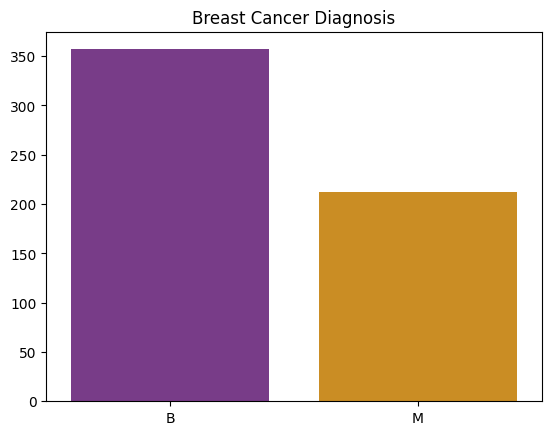

In [10]:
#Univariate analysis 'diagnosis'
data_plot  = df['diagnosis'].value_counts().to_list()
label_plot = df['diagnosis'].value_counts().index.to_list()

title = 'Breast Cancer Diagnosis'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

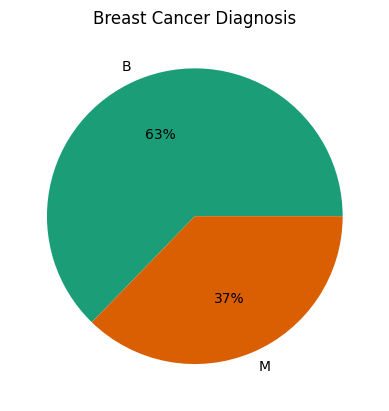

In [12]:
color = sns.color_palette('Dark2')

plot       = plt.pie(data_plot, labels=label_plot, colors=color, autopct='%.0f%%')
plot_title = plt.title(title)

plt.show()

Membuat chart untuk melihat persebaran data diagnosis. Pada dataset terdapat 357 pasien dengan status benign (tumor jinak), dan 212 pasien dengan status malignant (kanker). Dengan ini, 63% pasien di dataset memiliki status benign. Sedangkan 37% terjangkit kanker payudara (malignant).

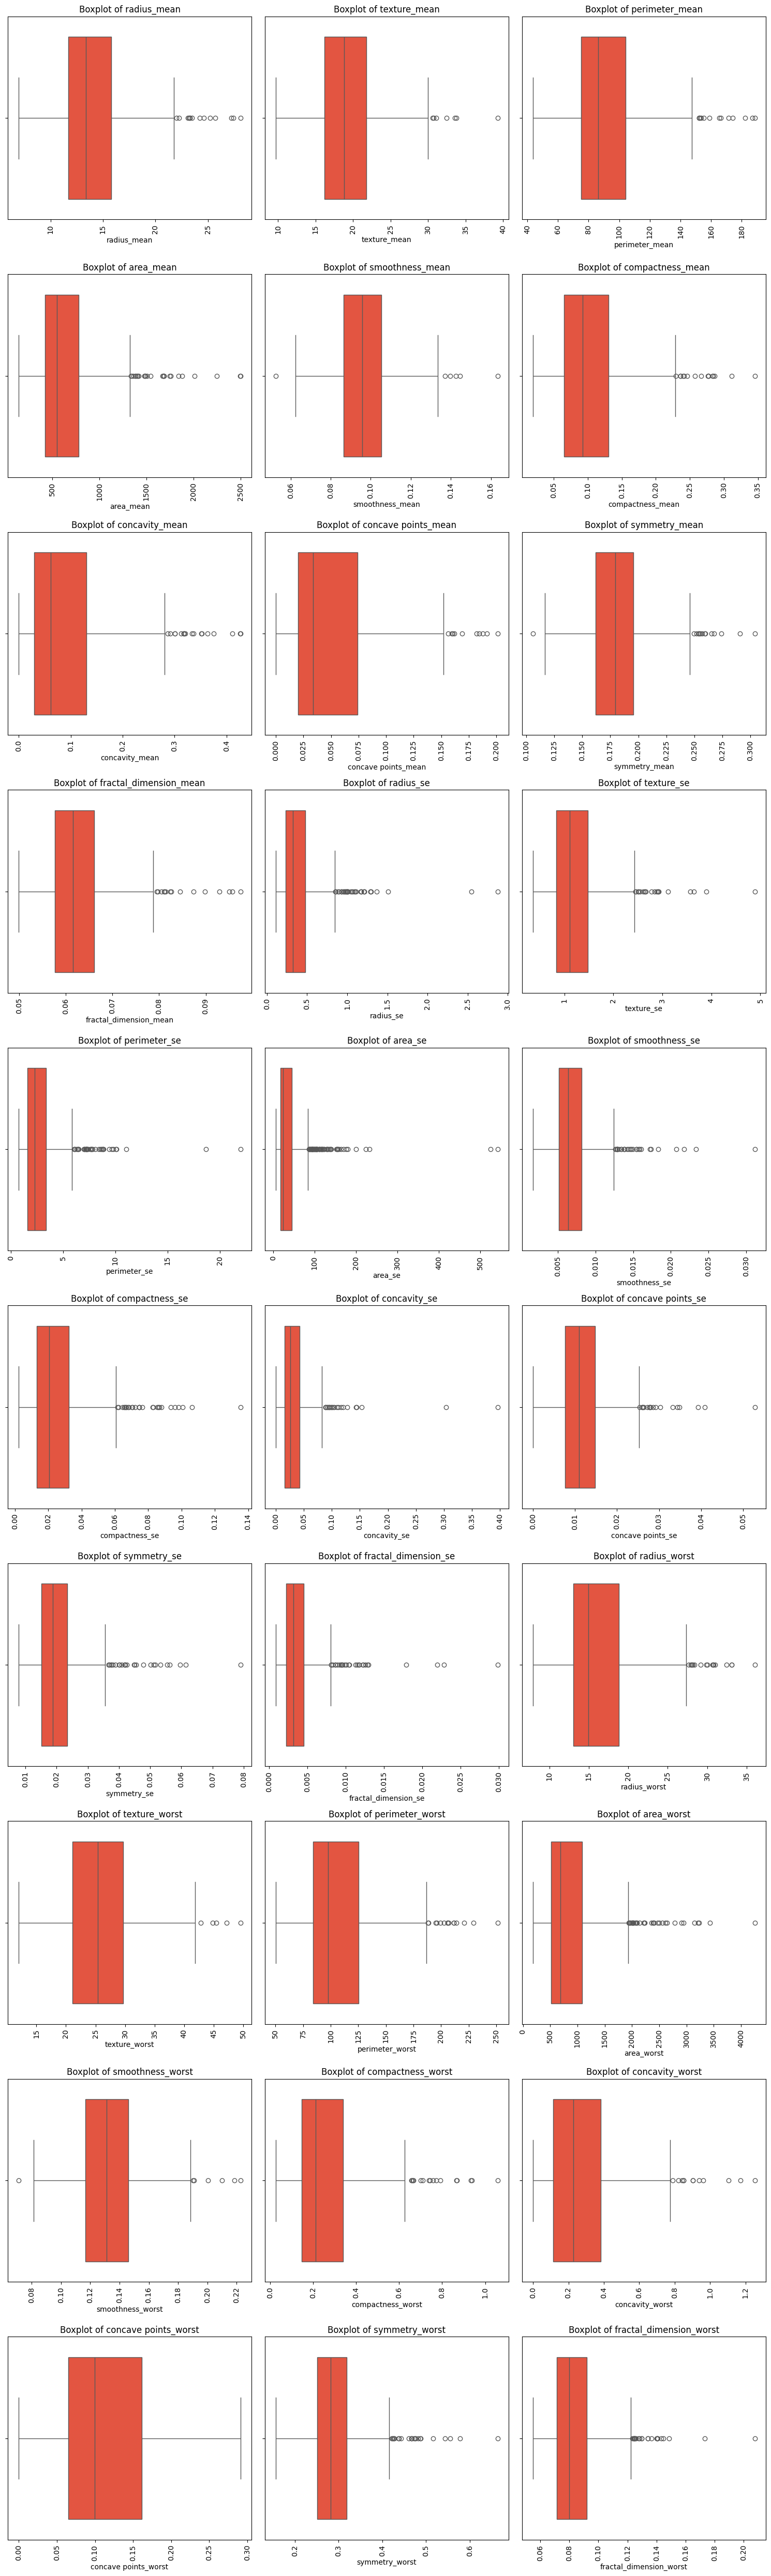

In [13]:
#Boxplot of numeric variables
column_name_list_num = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Boxplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.boxplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Boxplot of" + " " + var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Box plot adalah visualisasi yang dibuat untuk menggambarkan bentuk distribusi dan penyebaran data. Pada box plot dapat terlihat kuartil, jarak antar kuartil, batas minimum dan maksimum, serta outlier pada data. Dibuat box plot untuk masing-masing kolom numerik.

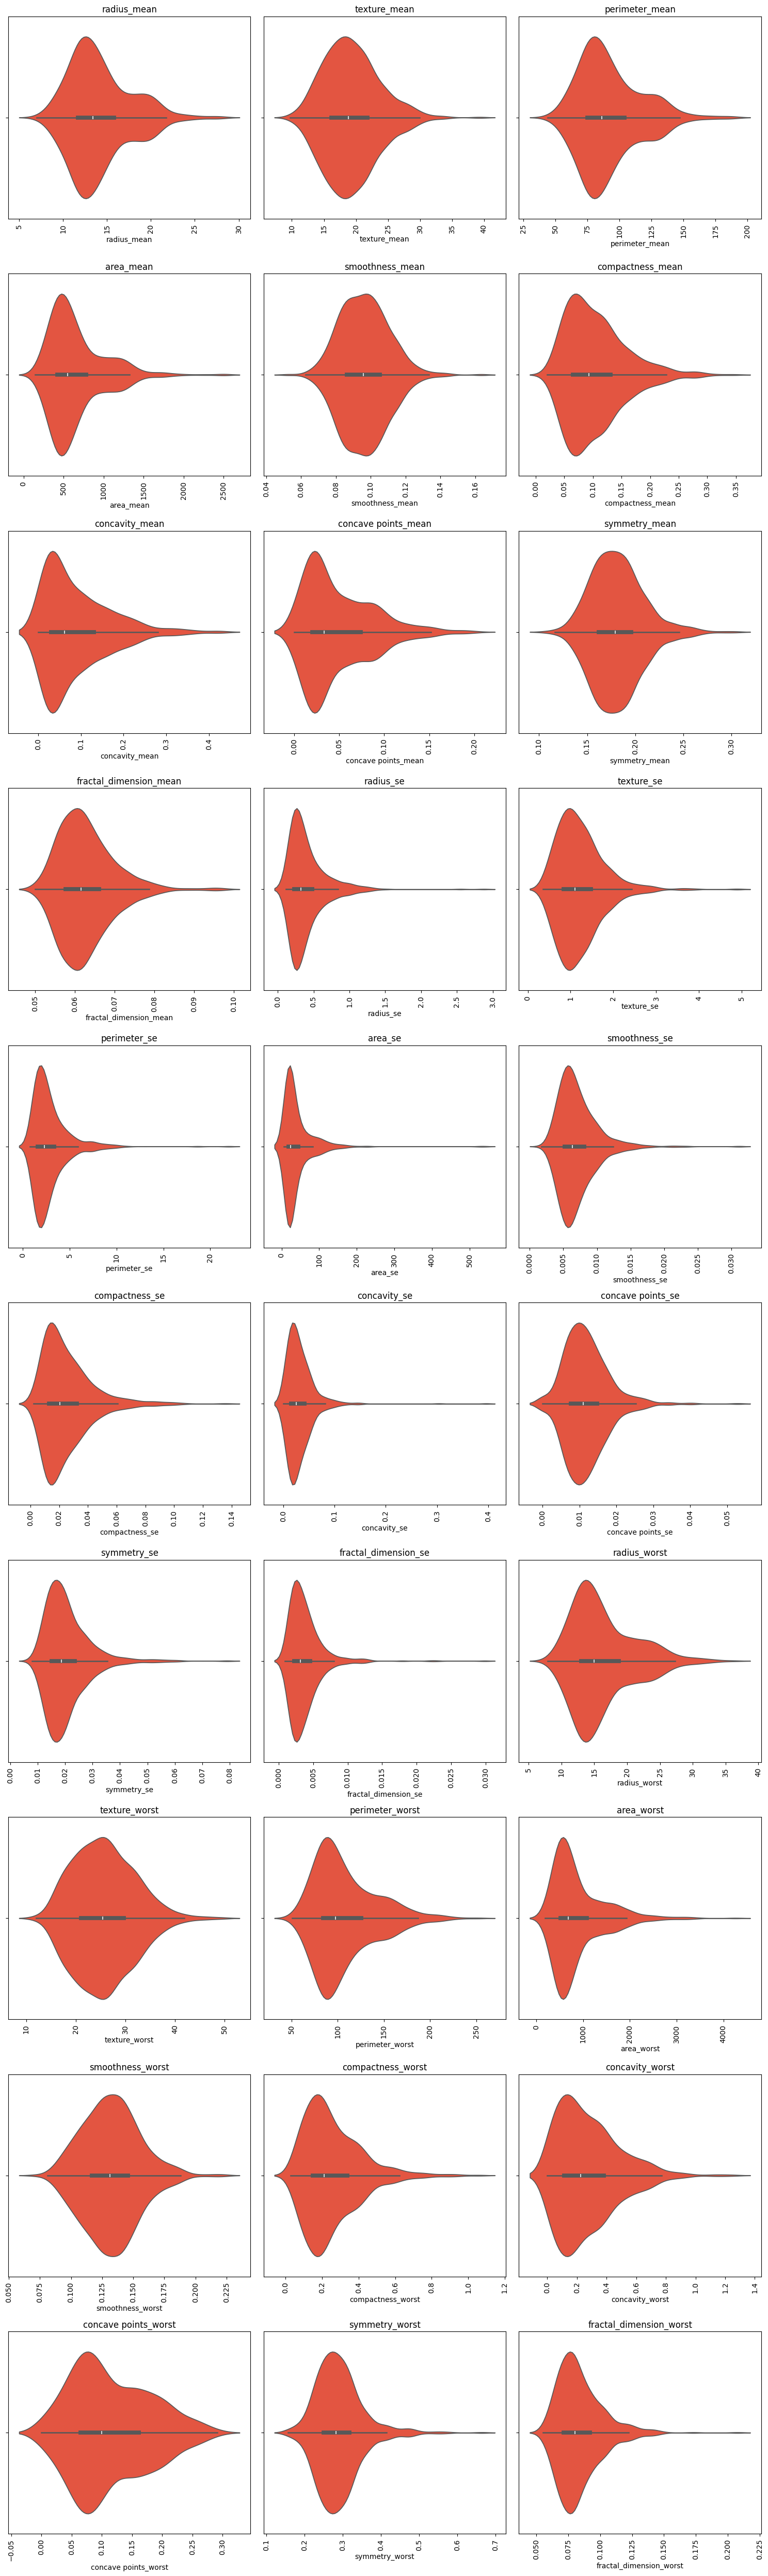

In [14]:
#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Violin plot for each variables
for i, var in enumerate (column_name_list_num):
  sns.violinplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Violin plot adalah variasi dari box plot yang ditambah kernel density plot. Dibuat violin plot untuk masing-masing kolom numerik.


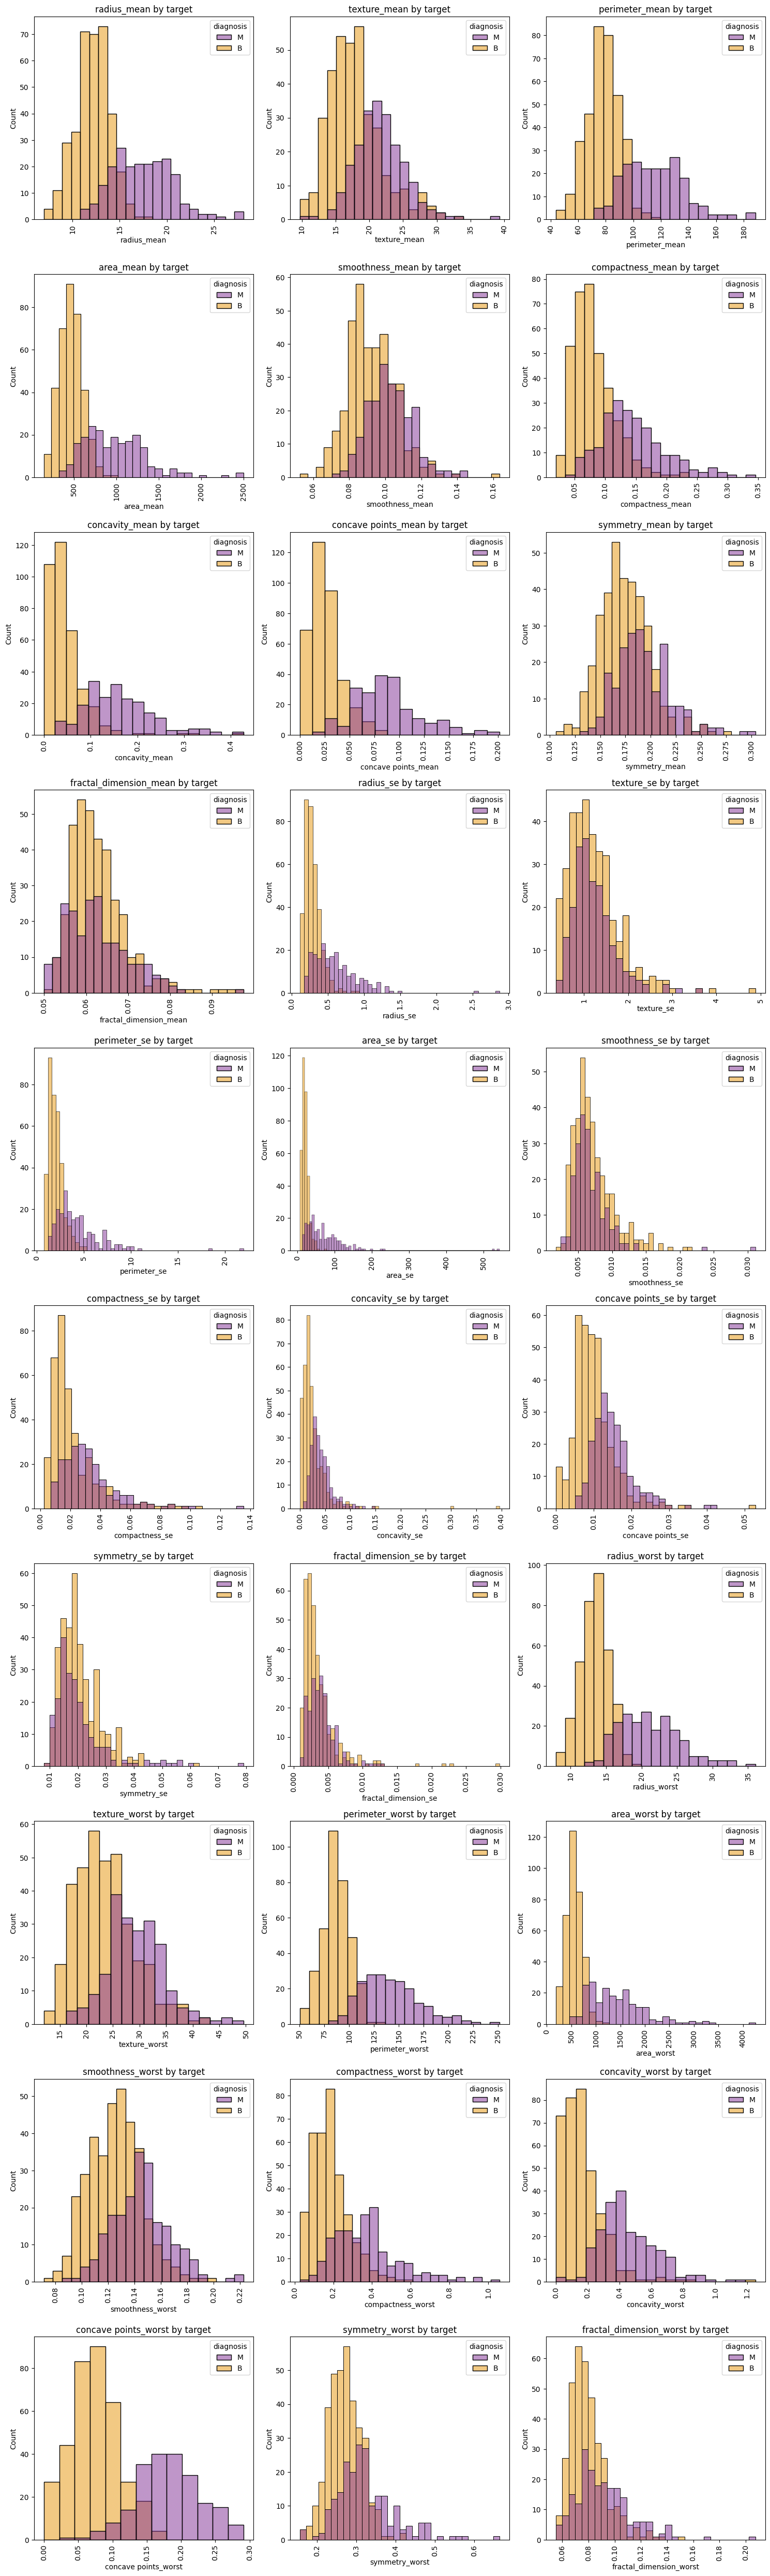

In [15]:
#Histogram overlay of 'diagnosis' with the independent variables
#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Histplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, hue = 'diagnosis', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "by target")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Histogram adalah grafik untuk melihat pola distribusi data. Dibuat histogram untuk masing-masing kolom numerik dengan overlay status diagnosis untuk melihat perbedaan penyebaran data numerik pada setiap jenis diagnosis.

Dapat dilihat bahwa pada dataset, mayoritas pasien dengan status benign memiliki hasil pengukuran tumor yang lebih kecil.

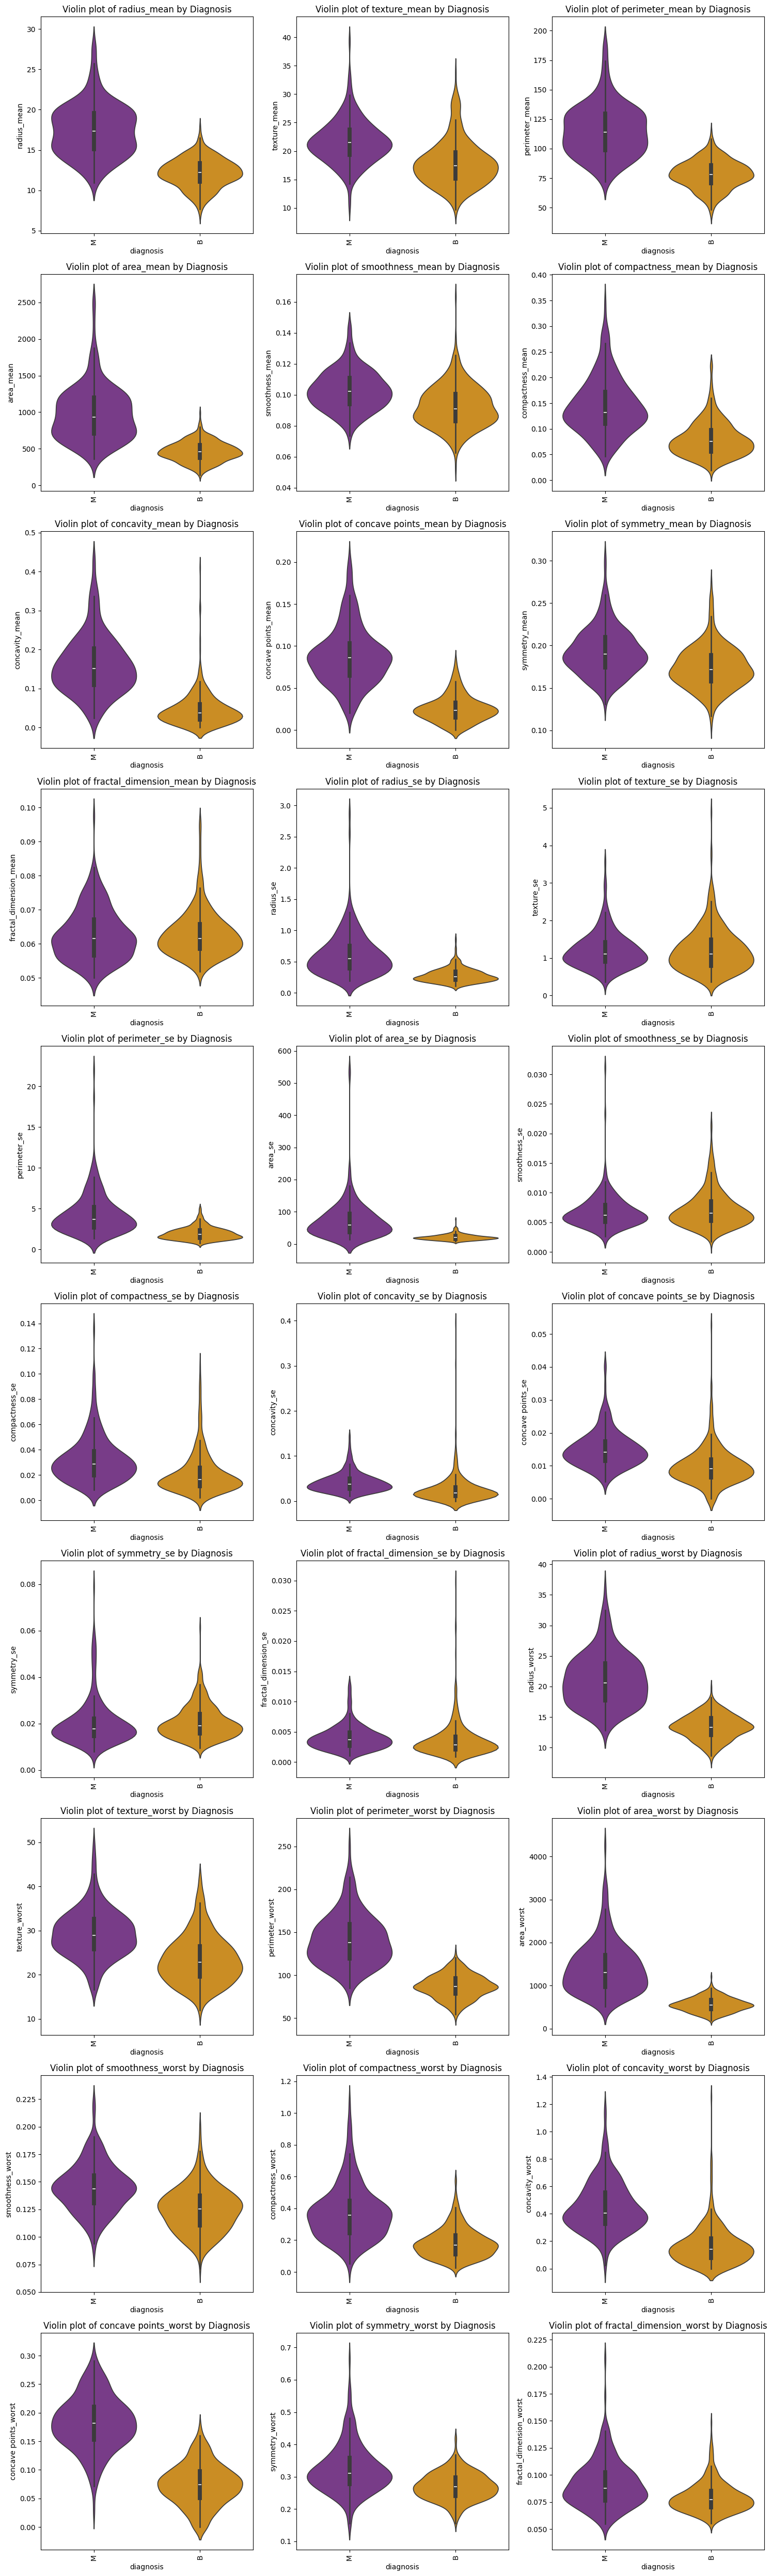

In [16]:
#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Violin plot for each variables
for i, var in enumerate (column_name_list_num):
  sns.violinplot(y=var, x='diagnosis', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Violin plot of" + " " + var + " " + "by Diagnosis")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Violin plot untuk masing-masing kolom numerik dengan overlay status diagnosis untuk melihat perbedaan distribusi data numerik pada setiap jenis diagnosis.

In [17]:
#Mean of each column values in each class
df.groupby(by = 'diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


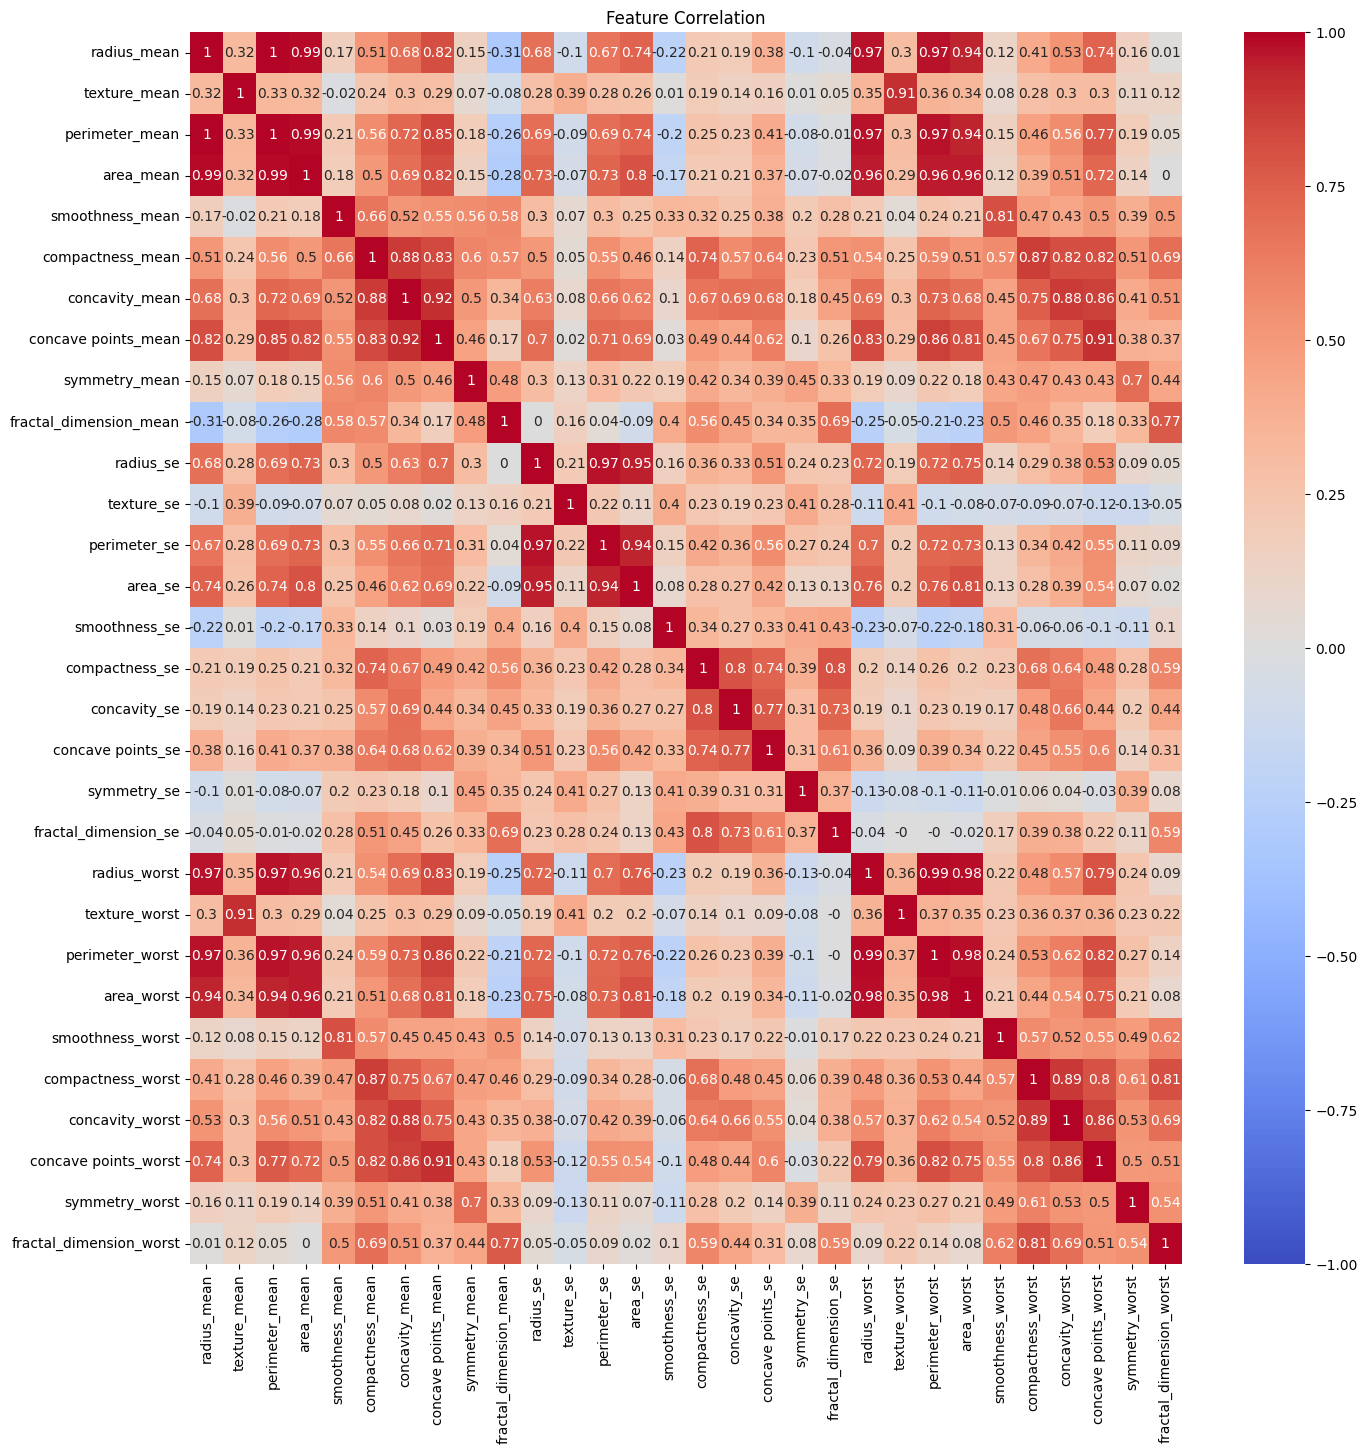

In [18]:
#Correlations between features
matrix = df.corr().round(2)
plt.figure(figsize=(16,16))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Korelasi antar fitur numerik dapat dilihat pada gambar diatas. Nilai korelasi dibulatkan menjadi 2 angka dibelakang nol. Semakin tinggi nilai maka korelasi semakin kuat. Korelasi bernilai positif berarti berbanding lurus, jika korelasi bernilai negatif maka korelasi berbanding terbalik.


##Labelling Categorical Data

In [19]:
#Labeling categorical data
diagnosis = {
    "B": 0,
    "M": 1
}

df['diagnosis'] = df['diagnosis'].map(diagnosis)

Hasil diagnosis bersifat categorical sehingga harus diubah ke numerik agar dapat digunakan model. Dilakukan labelling value kolom diagnosis dengan "B" = 0 dan "M" = 1. Labelling dilakukan dengan mapping value berdasarkan dictionary yang telah dibuat.

## Balancing Data + Splitting the dataset into the Training set and Test set

In [20]:
#Defining x and y
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

Setelah labelling data, data dibagi menjadi x dan y. X berisi variabel penentu hasil diagnosis (seluruh kolom numerik kecuali diagnosis) dan Y berisi variabel target (diagnosis).


In [21]:
from imblearn.over_sampling import SMOTE
#define oversampling strategy
SMOTE = SMOTE()

#fit and apply the transform
x_SMOTE, y_SMOTE = SMOTE.fit_resample(x, y)

Selanjutnya, dilakukan balancing data dengan metode oversampling SMOTE karena jumlah data tidak terlalu seimbang. Balancing data dilakukan agar model dapat mencapai akurasi yang lebih tinggi.


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_SMOTE, y_SMOTE, test_size = 0.2, random_state = 42)

Dataset lalu dibagi menjadi train dan test dengan rasio 80:20. Alasan kenapa ditetapkan jumlah tersebut adalah karena pada umumnya 80/20 dianggap cukup baik (kecuali jika data training sangatlah banyak, maka rasio data split bisa berubah). Pada dataset project ini, jumlah kolom tidak terlalu banyak sehingga diperlukan data training yang cukup untuk memastikan model terlatih dengan baik.


In [23]:
x_train.shape, x_test.shape

((571, 30), (143, 30))

## Modelling

### Gradient Boosting

Import algoritma dari sklearn.ensemble

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

Proses pelatihan/fitting model menggunakan x_train dan y_train yang telah dibagi sebelumnya.

In [25]:
#Training the model
gb.fit(x_train, y_train)

GradientBoostingClassifier()

Memprediksi data testing dengan model yang telah dilatih.


In [26]:
#Predict testing set
y_pred_gb = gb.predict(x_test)

Mengevaluasi model dengan metrik-metrik yang telah ditentukan

In [27]:
print('Training-set accuracy score:', gb.score(x_train, y_train))
print('Test-set accuracy score:', gb.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.951048951048951


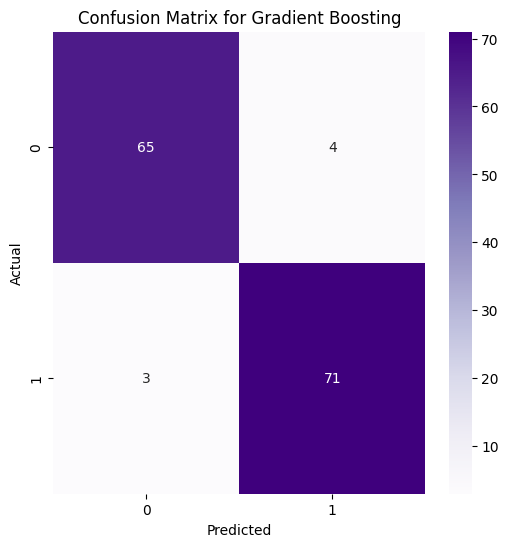

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_gb), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

In [29]:
#Check model performance using classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.95      0.96      0.95        74

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [31]:
#Specificity
cm = confusion_matrix(y_test, y_pred_gb)

specificity = cm[1,1]/(cm[1,0] + cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.9594594594594594


In [32]:
#Check model performance using auc score
roc_auc_score(y_test, y_pred_gb)*100

95.07442224833528

### Random Forest

Import algoritma Random Forest dari from sklearn.ensemble dan melatih model menggunakan x_train dan y_train

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)

Mengevaluasi model dengan metrik-metrik yang telah ditentukan

In [34]:
print('Training-set accuracy score:', classifier_rf.score(x_train, y_train))
print('Test-set accuracy score:', classifier_rf.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.965034965034965


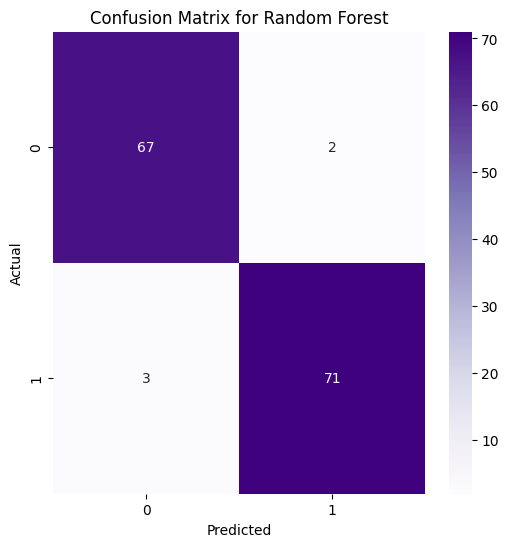

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [36]:
#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.97      0.96      0.97        74

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [46]:
#Specificity
cm = confusion_matrix(y_test, y_pred_rf)

specificity = cm[1,1]/(cm[1,0] + cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.9594594594594594


In [38]:
roc_auc_score(y_test, y_pred_rf)*100

96.52369761065414

### Stacking Model

Import base model yang dibutuhkan seperti SVC, Decision Tree, Logistic Regression, Random Forest, XG Boost. Lalu, import metode stacking dengan kode "from sklearn.ensemble import StackingClassifier"
Setelah itu, gabungkan base model dan menentukan model final (meta-model) Pada project ini, final model adalah logistic regression. Pada gambar dibawah, dapat dilihat urutan model stacking.
Terakhir, lakukan pelatihan/fitting model menggunakan x_train dan y_train.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

base_models = [('Decision Tree',DecisionTreeClassifier()),('Logistic Regression',LogisticRegression()), ('Random Forest', RandomForestClassifier()), ('xgb', XGBClassifier())]
stacking = StackingClassifier(estimators = base_models, final_estimator = LogisticRegression(), cv = 5)
stacking.fit(x_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Logistic Regression', LogisticRegression()),
                               ('Random Forest', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categori...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

 Memprediksi data testing dengan model yang telah dilatih

In [40]:
y_pred_st = stacking.predict(x_test)

Mengevaluasi model dengan metrik-metrik yang telah ditentukan

In [41]:
print('Training-set accuracy score:', stacking.score(x_train, y_train))
print('Test-set accuracy score:', stacking.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.972027972027972


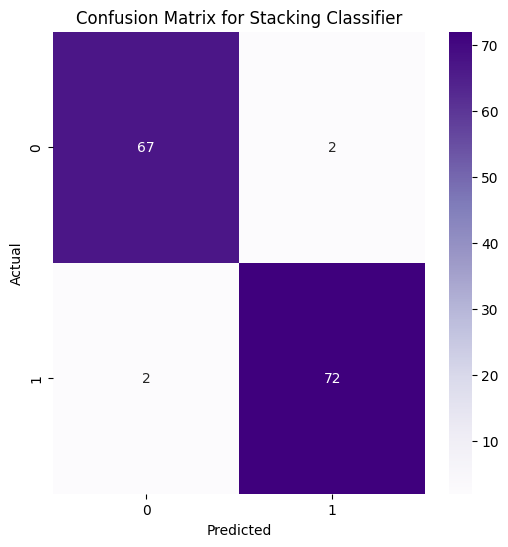

In [42]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_st), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()

In [43]:
#Classification report
print(classification_report(y_test, y_pred_st))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [44]:
#Specificity
cm = confusion_matrix(y_test, y_pred_st)

specificity = cm[1,1]/(cm[1,0] + cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.972972972972973


In [45]:
roc_auc_score(y_test, y_pred_st)*100

97.1993732863298

#**Conclusion**
From the experiments and metrics comparison, it can be seen that the stacking model has higher scores in various metrics than the other two models (Gradient Boost and Random Forest).
Because this project is a project in healthcare, the model with the highest metrics will be sought to minimize the chance of error.
